In [1]:
# visualizations are in the last three cells
import numpy as np
import pandas as pd
import seaborn as sns
location = "datasets/DC_Properties.csv"
df = pd.read_csv(location)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
# remove columns that are unncessary or duplicate
df.drop(labels=['Unnamed: 0','ROOMS','QUALIFIED','STYLE','STRUCT','EXTWALL','ROOF','INTWALL','LATITUDE','LONGITUDE'],axis=1,inplace=True)

In [4]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,NATIONALGRID,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,4,1910.0,1988.0,1972,3.0,...,18S UJ 23061 09289,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,5,1898.0,2007.0,1972,3.0,...,18S UJ 23067 09289,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,5,1910.0,2009.0,1984,3.0,...,18S UJ 23074 09289,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,5,1900.0,2003.0,1984,3.0,...,18S UJ 23078 09288,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,3,1913.0,2012.0,1985,3.0,...,18S UJ 23188 09253,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [5]:
# remove all columns that are null
df.drop(labels=['ASSESSMENT_NBHD','CENSUS_TRACT','CMPLX_NUM','LIVING_GBA'], axis = 1, inplace = True)
# remove all columns that have duplicate information
df.drop(labels=['X','Y','STORIES'], axis = 1, inplace = True)

In [6]:
# remove entries that are completely null
df.dropna(axis = 0, how = 'all', inplace = True)
# remove entries that are missing a complete address
df.dropna(axis = 0, subset = ['FULLADDRESS','STATE'], inplace = True)

In [7]:
# combine FULLADDRESS, CITY, STATE, ZIPCODE into a complete address
def addrCombine(full, city, state, zipc):
    return (full+" "+city+" "+state+" "+zipc)
df['COMPLETEADDR'] = addrCombine(df['FULLADDRESS'].astype(str), df['CITY'].astype(str),
                                        df['STATE'].astype(str), df['ZIPCODE'].astype(str))
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,BEDRM,AYB,YR_RMDL,EYB,SALEDATE,...,CITY,STATE,ZIPCODE,NATIONALGRID,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,COMPLETEADDR
0,4,0,Warm Cool,Y,2.0,4,1910.0,1988.0,1972,2003-11-25 00:00:00,...,WASHINGTON,DC,20009.0,18S UJ 23061 09289,040 D Old City 2,004201 2006,Ward 2,152,NW,1748 SWANN STREET NW WASHINGTON DC 20009.0
1,3,1,Warm Cool,Y,2.0,5,1898.0,2007.0,1972,2000-08-17 00:00:00,...,WASHINGTON,DC,20009.0,18S UJ 23067 09289,040 D Old City 2,004201 2006,Ward 2,152,NW,1746 SWANN STREET NW WASHINGTON DC 20009.0
2,3,1,Hot Water Rad,Y,2.0,5,1910.0,2009.0,1984,2016-06-21 00:00:00,...,WASHINGTON,DC,20009.0,18S UJ 23074 09289,040 D Old City 2,004201 2006,Ward 2,152,NW,1744 SWANN STREET NW WASHINGTON DC 20009.0
3,3,1,Hot Water Rad,Y,2.0,5,1900.0,2003.0,1984,2006-07-12 00:00:00,...,WASHINGTON,DC,20009.0,18S UJ 23078 09288,040 D Old City 2,004201 2006,Ward 2,152,NW,1742 SWANN STREET NW WASHINGTON DC 20009.0
4,2,1,Warm Cool,Y,1.0,3,1913.0,2012.0,1985,NaN,...,WASHINGTON,DC,20009.0,18S UJ 23188 09253,040 D Old City 2,004201 2006,Ward 2,152,NW,1804 NEW HAMPSHIRE AVENUE NW WASHINGTON DC 200...


In [8]:
# now since we have the COMPLETEADDR column, drop the FULLADDRESS, CITY, STATE, and ZIPCODE columns
df.drop(labels=['FULLADDRESS','CITY','STATE','ZIPCODE'], axis = 1, inplace = True)
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,BEDRM,AYB,YR_RMDL,EYB,SALEDATE,...,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,NATIONALGRID,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,COMPLETEADDR
0,4,0,Warm Cool,Y,2.0,4,1910.0,1988.0,1972,2003-11-25 00:00:00,...,1680,2018-07-22 18:01:43,Residential,18S UJ 23061 09289,040 D Old City 2,004201 2006,Ward 2,152,NW,1748 SWANN STREET NW WASHINGTON DC 20009.0
1,3,1,Warm Cool,Y,2.0,5,1898.0,2007.0,1972,2000-08-17 00:00:00,...,1680,2018-07-22 18:01:43,Residential,18S UJ 23067 09289,040 D Old City 2,004201 2006,Ward 2,152,NW,1746 SWANN STREET NW WASHINGTON DC 20009.0
2,3,1,Hot Water Rad,Y,2.0,5,1910.0,2009.0,1984,2016-06-21 00:00:00,...,1680,2018-07-22 18:01:43,Residential,18S UJ 23074 09289,040 D Old City 2,004201 2006,Ward 2,152,NW,1744 SWANN STREET NW WASHINGTON DC 20009.0
3,3,1,Hot Water Rad,Y,2.0,5,1900.0,2003.0,1984,2006-07-12 00:00:00,...,1680,2018-07-22 18:01:43,Residential,18S UJ 23078 09288,040 D Old City 2,004201 2006,Ward 2,152,NW,1742 SWANN STREET NW WASHINGTON DC 20009.0
4,2,1,Warm Cool,Y,1.0,3,1913.0,2012.0,1985,NaN,...,2032,2018-07-22 18:01:43,Residential,18S UJ 23188 09253,040 D Old City 2,004201 2006,Ward 2,152,NW,1804 NEW HAMPSHIRE AVENUE NW WASHINGTON DC 200...


In [9]:
# remove entries that have null price
df.dropna(subset=['PRICE'], axis = 0, inplace = True)
df.tail()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,BEDRM,AYB,YR_RMDL,EYB,SALEDATE,...,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,NATIONALGRID,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,COMPLETEADDR
106687,2,0,Forced Air,N,2.0,4,1953.0,NaN,1962,2004-02-10 00:00:00,...,5837,2018-07-22 18:01:43,Residential,18S UH 25869 98919,016 A Congress Heights,010900 2000,Ward 8,6254,SW,107 JOLIET STREET SW WASHINGTON DC 20032.0
106688,2,0,Forced Air,Y,2.0,4,1953.0,2017.0,1971,2016-06-27 00:00:00,...,5302,2018-07-22 18:01:43,Residential,18S UH 25851 98915,016 A Congress Heights,010900 2000,Ward 8,6254,SW,111 JOLIET STREET SW WASHINGTON DC 20032.0
106692,2,0,Forced Air,N,2.0,5,1953.0,NaN,1962,2012-02-17 00:00:00,...,5348,2018-07-22 18:01:43,Residential,18S UH 25818 98885,016 A Congress Heights,010900 2000,Ward 8,6254,SW,127 JOLIET STREET SW WASHINGTON DC 20032.0
106694,2,0,Forced Air,N,2.0,4,1953.0,2017.0,1971,2017-07-27 00:00:00,...,3046,2018-07-22 18:01:43,Residential,18S UH 25807 98865,016 A Congress Heights,010900 2000,Ward 8,6254,SW,135 JOLIET STREET SW WASHINGTON DC 20032.0
106695,2,0,Forced Air,Y,2.0,4,1953.0,2018.0,1971,2017-11-08 00:00:00,...,5098,2018-07-22 18:01:43,Residential,18S UH 25804 98859,016 A Congress Heights,010900 2000,Ward 8,6254,SW,139 JOLIET STREET SW WASHINGTON DC 20032.0


In [10]:
# remove entries that have no bedrooms or no bathrooms (??)
realHousesOnly_df = df[(df['BEDRM'] != 0) & (df['BATHRM'] != 0)]

In [11]:
# table sorted by number of bedrooms and bathrooms
pd.pivot_table(realHousesOnly_df,values=['PRICE'],index=['BEDRM','BATHRM'])

PRICE
BEDRM BATHRM              
1     1       4.115048e+05
      2       4.161885e+05
      3       5.156250e+05
      4       2.539750e+05
2     1       3.053115e+05
      2       4.518034e+05
      3       6.465010e+05
      4       7.451256e+05
3     1       3.117127e+05
      2       4.760689e+05
      3       6.780655e+05
      4       9.456882e+05
      5       7.296000e+05
      6       4.000000e+05
      7       4.217000e+06
4     1       3.398333e+05
      2       5.172340e+05
      3       7.733154e+05
      4       7.797201e+05
      5       1.556193e+06
      6       2.264856e+06
      7       2.450000e+06
      8       7.500000e+05
5     1       3.672648e+05
      2       5.815059e+05
      3       8.920944e+05
      4       1.281536e+06
      5       1.753328e+06
      6       2.549486e+06
      7       2.580000e+06
...                    ...
9     3       5.789950e+05
      4       5.416591e+05
      5       1.513591e+06
      6       6.293000e+06
      7       3.286414e+06
      8       5.405500e+06
      9       8.811935e+06
      10      4.450000e+06
      12      1.225000e+07
10    3       2.503333e+05
      4       4.430260e+05
      5       9.980000e+05
      6       1.147917e+06
      7       7.950000e+05
      11      1.375000e+06
11    3       2.415600e+05
      5       1.400000e+05
      8       4.200000e+05
      9       4.562800e+05
      10      1.700000e+06
      11      1.850000e+06
12    2       2.100000e+05
      4       4.353146e+05
      5       2.330000e+05
      6       2.665080e+05
      7       2.396029e+07
13    6       4.425000e+05
14    4       9.250000e+05
15    10      1.105000e+06
20    10      1.900000e+06

[90 rows x 1 columns]

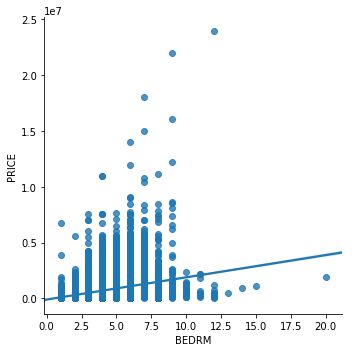

In [12]:
sns.lmplot(x='BEDRM', y='PRICE', data=realHousesOnly_df)

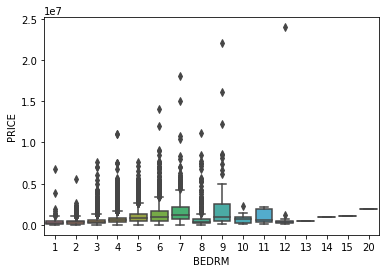

In [13]:
# need to filter data for boxplot otherwise all fields will be shown (and it'll be messy)
boxplot_df = realHousesOnly_df.filter(['BEDRM','BATHRM','PRICE'], axis = 1)
bedrm_df = realHousesOnly_df.filter(['BEDRM'], axis = 1)
bathrm_df = realHousesOnly_df.filter(['BATHRM'], axis = 1)
sns.boxplot(data = boxplot_df,x = 'BEDRM',y = 'PRICE')

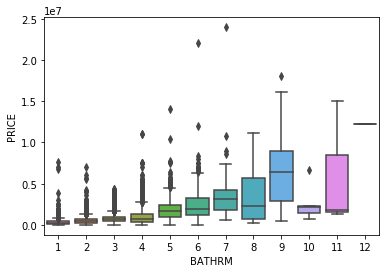

In [14]:
sns.boxplot(data = boxplot_df,x = 'BATHRM',y = 'PRICE')

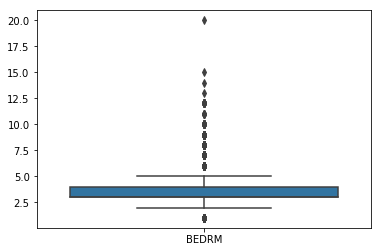

In [15]:
sns.boxplot(data = bedrm_df)

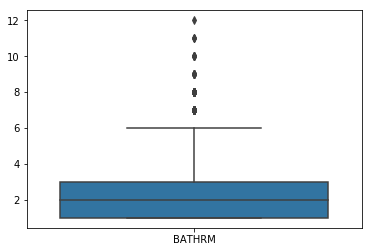

In [16]:
sns.boxplot(data = bathrm_df)

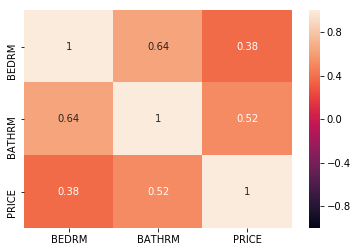

In [17]:
sns.heatmap(boxplot_df.corr(), vmin = -1, annot = True)